In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
dataset= pd.read_csv(r'autos.csv',encoding='ISO-8859–1')
dataset

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371523,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200,test,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,2016-03-14 00:00:00,0,39576,2016-04-06 00:46:52
371524,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199,test,cabrio,2000,automatik,101,fortwo,125000,3,benzin,smart,nein,2016-03-05 00:00:00,0,26135,2016-03-11 18:17:12
371525,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200,test,bus,1996,manuell,102,transporter,150000,3,diesel,volkswagen,nein,2016-03-19 00:00:00,0,87439,2016-04-07 07:15:26
371526,2016-03-20 19:41:08,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400,test,kombi,2002,manuell,100,golf,150000,6,diesel,volkswagen,NaN,2016-03-20 00:00:00,0,40764,2016-03-24 12:45:21


In [3]:
dataset[['vehicleType']]

,vehicleType
0,NaN
1,coupe
2,suv
3,kleinwagen
4,kleinwagen
...,...
371523,NaN
371524,cabrio
371525,bus
371526,kombi


In [4]:
dataset[['vehicleType']].isnull().any()

vehicleType    True
dtype: bool

In [5]:
dataset[['vehicleType']].isnull()

,vehicleType
0,True
1,False
2,False
3,False
4,False
...,...
371523,True
371524,False
371525,False
371526,False


In [6]:
dataset[["vehicleType"]].values

array([[nan],
       ['coupe'],
       ['suv'],
       ...,
       ['bus'],
       ['kombi'],
       ['limousine']], dtype=object)

In [7]:
dataset.isnull().any()

dateCrawled            False
name                   False
seller                 False
offerType              False
price                  False
abtest                 False
vehicleType             True
yearOfRegistration     False
gearbox                 True
powerPS                False
model                   True
kilometer              False
monthOfRegistration    False
fuelType                True
brand                  False
notRepairedDamage       True
dateCreated            False
nrOfPictures           False
postalCode             False
lastSeen               False
dtype: bool

In [8]:
dataset.nunique()

dateCrawled            280500
name                   233531
seller                      2
offerType                   2
price                    5597
abtest                      2
vehicleType                 8
yearOfRegistration        155
gearbox                     2
powerPS                   794
model                     251
kilometer                  13
monthOfRegistration        13
fuelType                    7
brand                      40
notRepairedDamage           2
dateCreated               114
nrOfPictures                1
postalCode               8150
lastSeen               182806
dtype: int64

# Drop unnecessary columns

In [9]:
dataset.groupby('offerType').size()

offerType
Angebot    371516
Gesuch         12
dtype: int64

In [10]:
#Gesuch means request and no need to consider 12 requests so drop offer type column

In [11]:
dataset['nrOfPictures'].sum()

0

In [12]:
# no pictures so remove that column

In [13]:
#DateCrawled , Date Created and last seen are for all practical purposes the same for all the cars so remove those columns 

In [14]:
dataset.groupby('seller').size()

seller
gewerblich         3
privat        371525
dtype: int64

In [15]:
# Basically all cars have same sellers so remove that column too

In [16]:
#abtest isn't related to the cars so its removed

In [17]:
dataset.drop(['dateCrawled','nrOfPictures','lastSeen','postalCode','dateCreated','abtest','seller','offerType'],axis=1,inplace=True)

In [18]:
# Removing month by adding 1 to year if month >=6 and keeping year as it is if month is less than 6

In [19]:
dataset['yearOfRegistration']

0         1993
1         2011
2         2004
3         2001
4         2008
          ... 
371523    2005
371524    2000
371525    1996
371526    2002
371527    2013
Name: yearOfRegistration, Length: 371528, dtype: int64

In [20]:
dataset.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'monthOfRegistration', 'fuelType',
       'brand', 'notRepairedDamage'],
      dtype='object')

In [21]:
a=dataset.iloc[:,3].values
a

array([1993, 2011, 2004, ..., 1996, 2002, 2013], dtype=int64)

In [22]:
b=dataset.iloc[:,8].values
b

array([0, 5, 8, ..., 3, 6, 8], dtype=int64)

In [23]:
n=len(a)
i=0
while i<= n-1:
    if b[i]<6:
        pass
    else:
        a[i]=a[i]+1
    i+=1
        

In [24]:
a

array([1993, 2011, 2005, ..., 1996, 2003, 2014], dtype=int64)

In [25]:
type(a)

numpy.ndarray

In [26]:
new_series = pd.Series(a)

In [27]:
dataset['yearOfRegistration']=new_series
dataset['yearOfRegistration']

0         1993
1         2011
2         2005
3         2002
4         2009
          ... 
371523    2005
371524    2000
371525    1996
371526    2003
371527    2014
Name: yearOfRegistration, Length: 371528, dtype: int64

In [28]:
dataset.drop([ 'monthOfRegistration'],axis=1,inplace=True)

In [29]:
dataset

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage
0,Golf_3_1.6,480,NaN,1993,manuell,0,golf,150000,benzin,volkswagen,NaN
1,A5_Sportback_2.7_Tdi,18300,coupe,2011,manuell,190,NaN,125000,diesel,audi,ja
2,"Jeep_Grand_Cherokee_""Overland""",9800,suv,2005,automatik,163,grand,125000,diesel,jeep,NaN
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2002,manuell,75,golf,150000,benzin,volkswagen,nein
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2009,manuell,69,fabia,90000,diesel,skoda,nein
...,...,...,...,...,...,...,...,...,...,...,...
371523,Suche_t4___vito_ab_6_sitze,2200,NaN,2005,NaN,0,NaN,20000,NaN,sonstige_autos,NaN
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein
371526,VW_Golf_Kombi_1_9l_TDI,3400,kombi,2003,manuell,100,golf,150000,diesel,volkswagen,NaN


# Cleaning up the Data 

In [30]:
#Take a small samle of our data

In [31]:
sample_data=dataset.sample(n=10000, random_state=1)


In [32]:
#Seeing and analysing price

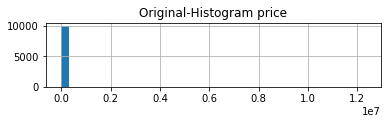

In [33]:
plt.subplot(3,1,1)
sample_data['price'].hist(bins=40)
plt.title('Original-Histogram price')
plt.show()

In [34]:
# Cars at  100000 or more are too expensive for used cars as they might be some vintage collecters cars and they might skew the rest of the data

In [35]:
dataset = dataset[dataset.price < 100000]
sample_data=dataset.sample(n=10000, random_state=1)

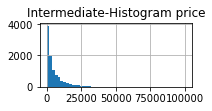

In [36]:
plt.subplot(3,2,1)
sample_data['price'].hist(bins=50)
plt.title('Intermediate-Histogram price')
plt.show()

In [37]:
# Price Distribution looks a little better but still work to do

In [38]:
# We gotta remove cars with extremely low price from skewing the data because they are like donations or even scams

In [39]:
# So remove cars with price less than 10

In [40]:
dataset=dataset[dataset.price>10]

In [41]:
sample_data=dataset.sample(n=10000, random_state=1)

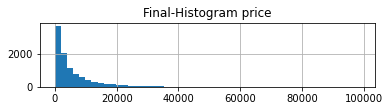

In [42]:
plt.subplot(3,1,3)
sample_data['price'].hist(bins=50)
plt.title('Final-Histogram price')
plt.show()

In [43]:
#Final Histogram looks good with less freebies and very expensive cars

In [44]:
# Now onto the years of registration

In [45]:
dataset['yearOfRegistration'].describe()

count    359001.000000
mean       2004.923694
std          79.149754
min        1000.000000
25%        2000.000000
50%        2004.000000
75%        2009.000000
max        9999.000000
Name: yearOfRegistration, dtype: float64

In [46]:
# 1000 AD and 9999 AD can't be true . Cars were first made in 1863 and present day in 2020. Removing data that is just not feasible 

In [47]:
dataset=dataset[(dataset.yearOfRegistration>1863)&(dataset.yearOfRegistration<=2020)]

In [48]:
# Power in ps of 0 and over 1000 is unrealistic so remove those rows

In [49]:
dataset = dataset[(dataset.powerPS > 0) & (dataset.powerPS < 1000)]

In [50]:
# Now we have clean data but it has some Nan values

In [51]:
clean_data=dataset

# Dealing with null values

In [52]:
clean_data.isnull().any()

name                  False
price                 False
vehicleType            True
yearOfRegistration    False
gearbox                True
powerPS               False
model                  True
kilometer             False
fuelType               True
brand                 False
notRepairedDamage      True
dtype: bool

In [53]:
clean_data['gearbox'].value_counts()

manuell      245558
automatik     70691
Name: gearbox, dtype: int64

In [54]:
clean_data['model'].value_counts()

golf               26760
andere             22554
3er                18508
polo               11141
corsa              10525
                   ...  
rangerover             5
samara                 5
kalina                 5
serie_3                3
discovery_sport        1
Name: model, Length: 250, dtype: int64

In [55]:
clean_data['fuelType'].value_counts()

benzin     198520
diesel      98227
lpg          4852
cng           503
hybrid        245
andere         97
elektro        84
Name: fuelType, dtype: int64

In [56]:
clean_data['notRepairedDamage'].value_counts()

nein    245181
ja       29737
Name: notRepairedDamage, dtype: int64

In [57]:
clean_data['vehicleType'].value_counts()

limousine     87260
kleinwagen    70169
kombi         61505
bus           27555
cabrio        21271
coupe         17142
suv           13575
andere         2539
Name: vehicleType, dtype: int64

In [58]:
# Making clean data super clean

In [59]:
superclean_data = clean_data.dropna()
print(superclean_data.describe())

               price  yearOfRegistration        powerPS      kilometer
count  247573.000000       247573.000000  247573.000000  247573.000000
mean     6796.387797         2004.050220     129.299435  123722.881736
std      8031.537499            6.427375      62.048253   39853.286204
min        11.000000         1923.000000       1.000000    5000.000000
25%      1699.000000         2000.000000      86.000000  100000.000000
50%      3999.000000         2005.000000     116.000000  150000.000000
75%      8900.000000         2009.000000     158.000000  150000.000000
max     99999.000000         2019.000000     999.000000  150000.000000


#  Encoding

In [60]:
superclean_data.columns

Index(['name', 'price', 'vehicleType', 'yearOfRegistration', 'gearbox',
       'powerPS', 'model', 'kilometer', 'fuelType', 'brand',
       'notRepairedDamage'],
      dtype='object')

In [61]:
superclean_data.isnull().any()

name                  False
price                 False
vehicleType           False
yearOfRegistration    False
gearbox               False
powerPS               False
model                 False
kilometer             False
fuelType              False
brand                 False
notRepairedDamage     False
dtype: bool

In [62]:
superclean_data['brand'].value_counts()

volkswagen       51733
bmw              29204
mercedes_benz    25529
opel             24623
audi             23929
ford             16348
renault          10673
peugeot           7457
fiat              5942
seat              4790
skoda             4393
mazda             3844
toyota            3531
citroen           3472
nissan            3326
smart             3197
mini              2817
hyundai           2670
volvo             2475
mitsubishi        1942
honda             1849
kia               1841
porsche           1688
alfa_romeo        1620
suzuki            1598
chevrolet         1259
chrysler           943
dacia              690
land_rover         604
jeep               589
subaru             520
daihatsu           473
jaguar             458
saab               405
lancia             302
daewoo             302
rover              243
trabant            166
lada               128
Name: brand, dtype: int64

In [63]:
# first dealing with year of Registration

In [64]:
h=superclean_data.iloc[:,3].values
h

array([2002, 2009, 1996, ..., 2000, 1996, 2014], dtype=int64)

In [65]:
len(h)

247573

In [66]:
g=list(h)
g

[2002,
 2009,
 1996,
 2005,
 2005,
 2006,
 2011,
 2004,
 2008,
 2004,
 2009,
 2003,
 1997,
 1991,
 2003,
 2009,
 1981,
 2003,
 1995,
 2007,
 2005,
 2003,
 1985,
 2008,
 2000,
 2008,
 1998,
 2013,
 2015,
 2006,
 1999,
 2004,
 2010,
 2007,
 2008,
 2009,
 2001,
 2002,
 2009,
 2007,
 2013,
 2004,
 2006,
 2011,
 2000,
 1995,
 2006,
 1998,
 2002,
 2010,
 2005,
 2013,
 2003,
 2014,
 2000,
 2007,
 2012,
 2000,
 2000,
 1998,
 2009,
 2007,
 2005,
 2002,
 1991,
 2006,
 2004,
 1997,
 2010,
 2003,
 2000,
 2002,
 1990,
 1996,
 2003,
 2001,
 2002,
 2012,
 1997,
 2007,
 2007,
 2001,
 2011,
 1999,
 2015,
 2003,
 1996,
 2005,
 2000,
 2004,
 2005,
 2003,
 1990,
 2008,
 2001,
 2004,
 2011,
 2000,
 2007,
 2007,
 2003,
 2007,
 2012,
 2000,
 2016,
 2011,
 2009,
 2004,
 2007,
 1969,
 1992,
 2009,
 2007,
 2007,
 1998,
 2007,
 2012,
 1999,
 2007,
 2006,
 2009,
 2012,
 1996,
 2010,
 2010,
 2010,
 2008,
 1994,
 2003,
 1997,
 1993,
 1993,
 2007,
 1991,
 2006,
 2009,
 2000,
 2005,
 2005,
 2000,
 2014,
 2004,
 2000,

In [67]:
d=0

In [68]:
f=[]
for item in g:
    d=2020-item
    f.append(d)

In [69]:
f

[18,
 11,
 24,
 15,
 15,
 14,
 9,
 16,
 12,
 16,
 11,
 17,
 23,
 29,
 17,
 11,
 39,
 17,
 25,
 13,
 15,
 17,
 35,
 12,
 20,
 12,
 22,
 7,
 5,
 14,
 21,
 16,
 10,
 13,
 12,
 11,
 19,
 18,
 11,
 13,
 7,
 16,
 14,
 9,
 20,
 25,
 14,
 22,
 18,
 10,
 15,
 7,
 17,
 6,
 20,
 13,
 8,
 20,
 20,
 22,
 11,
 13,
 15,
 18,
 29,
 14,
 16,
 23,
 10,
 17,
 20,
 18,
 30,
 24,
 17,
 19,
 18,
 8,
 23,
 13,
 13,
 19,
 9,
 21,
 5,
 17,
 24,
 15,
 20,
 16,
 15,
 17,
 30,
 12,
 19,
 16,
 9,
 20,
 13,
 13,
 17,
 13,
 8,
 20,
 4,
 9,
 11,
 16,
 13,
 51,
 28,
 11,
 13,
 13,
 22,
 13,
 8,
 21,
 13,
 14,
 11,
 8,
 24,
 10,
 10,
 10,
 12,
 26,
 17,
 23,
 27,
 27,
 13,
 29,
 14,
 11,
 20,
 15,
 15,
 20,
 6,
 16,
 20,
 9,
 24,
 14,
 19,
 13,
 19,
 11,
 7,
 25,
 25,
 18,
 20,
 7,
 11,
 9,
 18,
 19,
 19,
 11,
 12,
 17,
 6,
 20,
 20,
 4,
 20,
 5,
 10,
 22,
 10,
 11,
 15,
 22,
 8,
 18,
 25,
 8,
 10,
 10,
 30,
 9,
 20,
 15,
 15,
 19,
 23,
 15,
 11,
 15,
 20,
 23,
 18,
 18,
 13,
 13,
 22,
 11,
 13,
 15,
 6,
 11,
 20,
 6,


In [70]:
#Add age of car column

In [71]:
superclean_data['ageOfCar']=f

C:\Users\Krishna\ansel\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
superclean_data

,name,price,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,ageOfCar
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,2002,manuell,75,golf,150000,benzin,volkswagen,nein,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,2009,manuell,69,fabia,90000,diesel,skoda,nein,11
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,1996,manuell,102,3er,150000,benzin,bmw,ja,24
6,Peugeot_206_CC_110_Platinum,2200,cabrio,2005,manuell,109,2_reihe,150000,benzin,peugeot,nein,15
10,Mazda_3_1.6_Sport,2000,limousine,2005,manuell,105,3_reihe,150000,benzin,mazda,nein,15
...,...,...,...,...,...,...,...,...,...,...,...,...
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,2005,manuell,3,3er,150000,diesel,bmw,nein,15
371520,turbo_defekt,3200,limousine,2004,manuell,225,leon,150000,benzin,seat,ja,16
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,2000,automatik,101,fortwo,125000,benzin,smart,nein,20
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,1996,manuell,102,transporter,150000,diesel,volkswagen,nein,24


In [73]:
#Drop year of Registration

In [74]:
superclean_data.drop(['yearOfRegistration'],axis=1,inplace=True)

C:\Users\Krishna\ansel\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [75]:
superclean_data

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,ageOfCar
3,GOLF_4_1_4__3TÜRER,1500,kleinwagen,manuell,75,golf,150000,benzin,volkswagen,nein,18
4,Skoda_Fabia_1.4_TDI_PD_Classic,3600,kleinwagen,manuell,69,fabia,90000,diesel,skoda,nein,11
5,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,650,limousine,manuell,102,3er,150000,benzin,bmw,ja,24
6,Peugeot_206_CC_110_Platinum,2200,cabrio,manuell,109,2_reihe,150000,benzin,peugeot,nein,15
10,Mazda_3_1.6_Sport,2000,limousine,manuell,105,3_reihe,150000,benzin,mazda,nein,15
...,...,...,...,...,...,...,...,...,...,...,...
371518,Bmw_320_D_DPF_Touring_!!!,3999,kombi,manuell,3,3er,150000,diesel,bmw,nein,15
371520,turbo_defekt,3200,limousine,manuell,225,leon,150000,benzin,seat,ja,16
371524,Smart_smart_leistungssteigerung_100ps,1199,cabrio,automatik,101,fortwo,125000,benzin,smart,nein,20
371525,Volkswagen_Multivan_T4_TDI_7DC_UY2,9200,bus,manuell,102,transporter,150000,diesel,volkswagen,nein,24


# Label Encoding

In [76]:
from sklearn.preprocessing import LabelEncoder

In [77]:
superclean_data.loc[:,"vehicleType"] =LabelEncoder().fit_transform(superclean_data.loc[:,"vehicleType"])
superclean_data.loc[:,"fuelType"] =LabelEncoder().fit_transform(superclean_data.loc[:,"fuelType"])
superclean_data.loc[:,"gearbox"] =LabelEncoder().fit_transform(superclean_data.loc[:,"gearbox"])
superclean_data.loc[:,"notRepairedDamage"] =LabelEncoder().fit_transform(superclean_data.loc[:,"notRepairedDamage"])
superclean_data.loc[:,"brand"] =LabelEncoder().fit_transform(superclean_data.loc[:,"brand"])
superclean_data.loc[:,"model"] =LabelEncoder().fit_transform(superclean_data.loc[:,"model"])
superclean_data.loc[:,"name"] =LabelEncoder().fit_transform(superclean_data.loc[:,"name"])


C:\Users\Krishna\ansel\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Reason for using label encoding on name given further below

In [78]:
superclean_data

,name,price,vehicleType,gearbox,powerPS,model,kilometer,fuelType,brand,notRepairedDamage,ageOfCar
3,46837,1500,4,1,75,118,150000,1,37,1,18
4,103240,3600,4,1,69,103,90000,3,31,1,11
5,16665,650,6,1,102,11,150000,1,2,0,24
6,88270,2200,2,1,109,8,150000,1,25,1,15
10,58021,2000,6,1,105,10,150000,1,19,1,15
...,...,...,...,...,...,...,...,...,...,...,...
371518,28618,3999,5,1,3,11,150000,3,2,1,15
371520,140011,3200,6,1,225,142,150000,1,30,0,16
371524,106756,1199,2,0,101,108,125000,1,32,1,20
371525,128381,9200,1,1,102,224,150000,3,37,1,24


# Splitting  Data into x ,y

In [79]:
y=superclean_data.loc[:,"price"].values
x=superclean_data.loc[:,['name','gearbox','vehicleType','powerPS','model','kilometer','fuelType','brand','notRepairedDamage','ageOfCar']].values

# OneHotEncoding

In [80]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer

In [81]:
type(x)

numpy.ndarray

In [82]:
x

array([[ 46837,      1,      4, ...,     37,      1,     18],
       [103240,      1,      4, ...,     31,      1,     11],
       [ 16665,      1,      6, ...,      2,      0,     24],
       ...,
       [106756,      0,      2, ...,     32,      1,     20],
       [128381,      1,      1, ...,     37,      1,     24],
       [ 25807,      1,      6, ...,      2,      1,      6]], dtype=int64)

In [83]:
x.shape

(247573, 10)

In [84]:
y.shape

(247573,)

In [85]:
superclean_data.nunique()

name                 140509
price                  4945
vehicleType               8
gearbox                   2
powerPS                 496
model                   250
kilometer                13
fuelType                  7
brand                    39
notRepairedDamage         2
ageOfCar                 87
dtype: int64

We quite simply can't use One hot Encoding or even Label Binarizer for name because both of them ask for ridiculus amounts of memory which results in memory error. They ask around 29GB and 10.9  respectively. So instead I am using Label Encoding for name which isn't ideal but has been forced by memory limitations

# Train Test Split

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [87]:
x_train

array([[48755,     1,     6, ...,    37,     1,    20],
       [57343,     1,     4, ...,    21,     1,     5],
       [39356,     1,     2, ...,    10,     1,    27],
       ...,
       [10082,     1,     6, ...,     1,     1,    15],
       [73067,     1,     2, ...,    23,     1,     9],
       [58243,     1,     1, ...,    19,     1,    14]], dtype=int64)

# Random Forest Regressor

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
rf=RandomForestRegressor(n_estimators=100,criterion="mse",random_state=0)

In [90]:
x_test

array([[121548,      1,      6, ...,     37,      1,     19],
       [115966,      1,      5, ...,     37,      1,     14],
       [130930,      1,      4, ...,     37,      1,     14],
       ...,
       [ 51090,      1,      3, ...,     11,      1,     25],
       [ 19552,      0,      5, ...,      2,      1,     20],
       [ 38991,      0,      2, ...,     10,      1,     56]], dtype=int64)

In [91]:
y_test

array([ 1499,  5300,  2700, ...,  1800,  3150, 23500], dtype=int64)

In [92]:
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=0)

In [93]:
y_pred=rf.predict(x_test)
y_pred

array([ 1675.71866883,  7101.8       ,  3632.04884127, ...,
         918.94333333,  2491.14666667, 23644.2       ])

In [94]:
y_test

array([ 1499,  5300,  2700, ...,  1800,  3150, 23500], dtype=int64)

In [95]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8980910355498998

In [96]:
import pickle